In [1]:
import constants
import matplotlib.pyplot as plt

from helpers import rk4
from helpers import euler_method
from helpers import ODEs_fourboxes
from helpers import ODEs_nineboxes
from helpers import ODEs_onebox

['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9']
8.125


### **Calling/Plotting RK4 & Euler Integrations** ###

In [11]:
# initial_masses = constants.Mi0
constants.MODIFIED_EMISSIONS = True
constants.FORCING = False
constants.FIRE = False

xinitial = 1800
xfinal =   2200

n=3000

STEP SIZE: 0.13333333333333333
RK4 Time Elapsed: 1.742 seconds


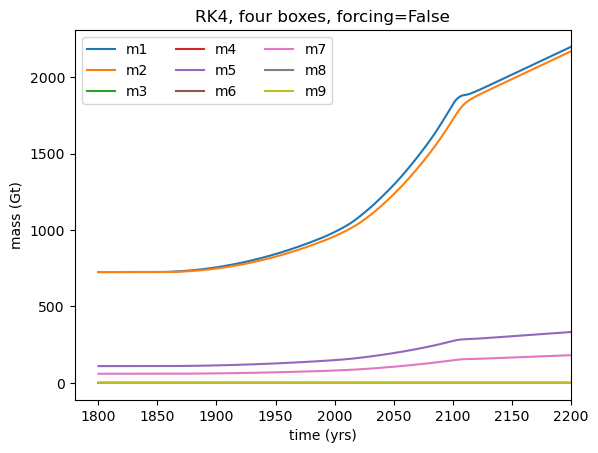

In [12]:
rungekutta_four = rk4(fxy=ODEs_fourboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_fourboxes, N=n)

plt.plot(rungekutta_four[0],rungekutta_four[1])
plt.title(f'RK4, four boxes, forcing={constants.FORCING}'), plt.xlim(right=2200), plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)'), plt.legend(constants.label_arr, ncol=3)
plt.show()

STEP SIZE: 0.13333333333333333
RK4 Time Elapsed: 1.658 seconds


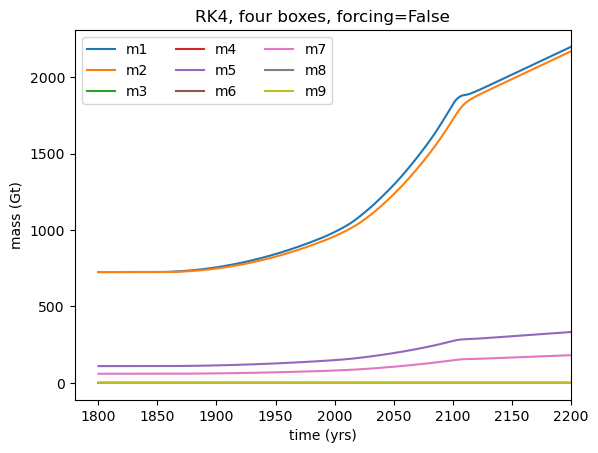

In [5]:
rungekutta_four = rk4(fxy=ODEs_fourboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_fourboxes, N=n)

plt.plot(rungekutta_four[0],rungekutta_four[1])
plt.title(f'RK4, four boxes, forcing={constants.FORCING}'), plt.xlim(right=2200), plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)'), plt.legend(constants.label_arr, ncol=3)
plt.show()

Euler Time Elapsed: 0.498 seconds


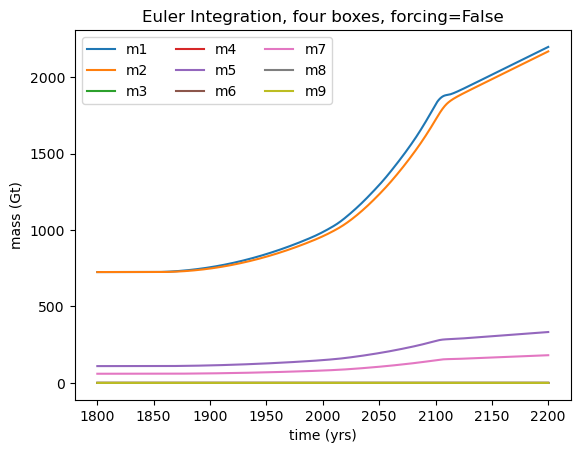

In [13]:
euler = euler_method(fxy=ODEs_fourboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_fourboxes, N=n)

plt.plot(euler[0],euler[1])
plt.title(f'Euler Integration, four boxes, forcing={constants.FORCING}'), plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)')
plt.legend(constants.label_arr, ncol=3)

plt.show()

STEP SIZE: 0.13333333333333333
RK4 Time Elapsed: 1.677 seconds


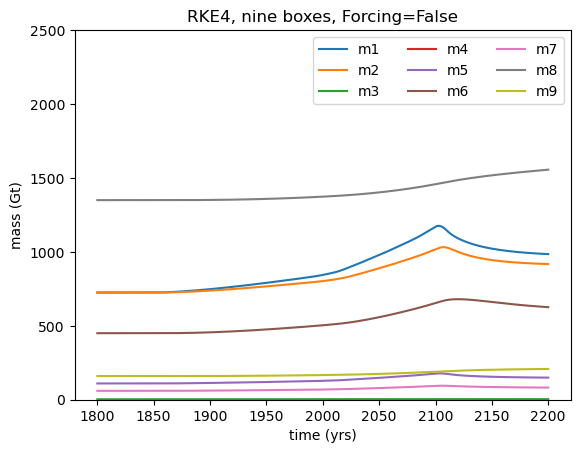

In [15]:
rungekutta_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

plt.plot(rungekutta_nine[0],rungekutta_nine[1])
plt.title(f'RKE4, nine boxes, Forcing={constants.FORCING}')
plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)'), plt.legend(constants.label_arr, ncol=3)
plt.ylim(0,2500)

plt.show()

# **1. Evolution of Boxes 1 & 2 Responding to 2012 IPCC's A2 Scenario**

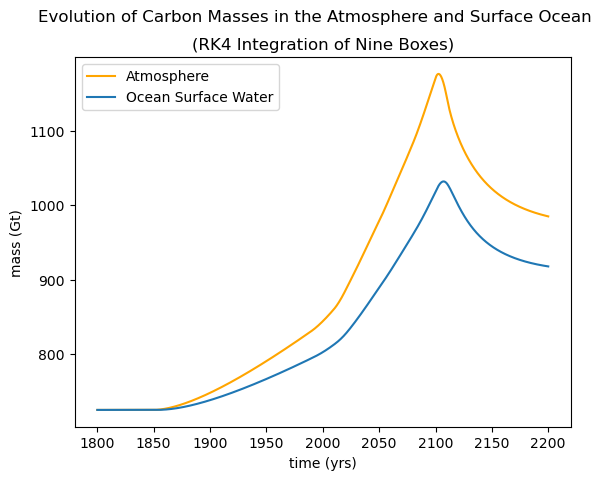

In [7]:
masses_nine = rungekutta_nine[1]
time_nine = rungekutta_nine[0]

atm_arr_nine = []
surfaceocean_arr_nine = []

for i in range(len(masses_nine)):
    atm_arr_nine.append(masses_nine[i][0])
    surfaceocean_arr_nine.append(masses_nine[i][1])    
    
plt.plot(time_nine, atm_arr_nine,'orange'), plt.plot(time_nine, surfaceocean_arr_nine)
plt.suptitle('Evolution of Carbon Masses in the Atmosphere and Surface Ocean')
plt.title('(RK4 Integration of Nine Boxes)')
plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)'), plt.legend(['Atmosphere','Ocean Surface Water'])

plt.show()

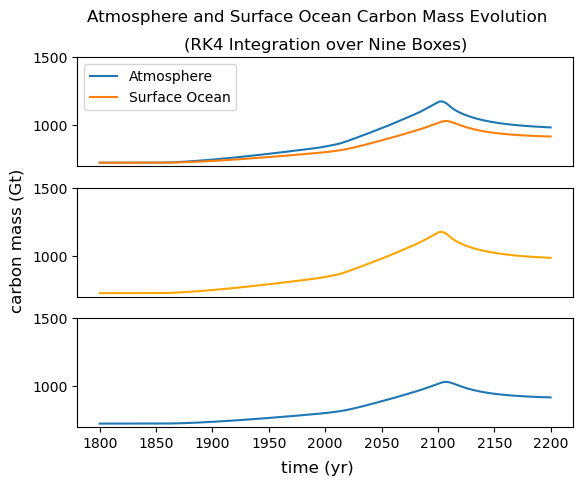

In [8]:
fig, axes = plt.subplots(3, 1)

ylim = [700,1500]
xlim = [1800,2200]

axes[0].plot(time_nine,atm_arr_nine), axes[0].plot(time_nine,surfaceocean_arr_nine), axes[0].set_ylim(ylim), axes[0].xaxis.set_visible(False)
axes[1].plot(time_nine, atm_arr_nine, 'orange'), axes[1].set_ylim(ylim), axes[1].xaxis.set_visible(False)
axes[2].plot(time_nine, surfaceocean_arr_nine),  axes[2].set_ylim(ylim)

axes[0].legend(['Atmosphere', 'Surface Ocean'])
axes[0].title.set_text('(RK4 Integration over Nine Boxes)')

fig.supxlabel('time (yr)')
fig.supylabel('carbon mass (Gt)')
fig.suptitle('Atmosphere and Surface Ocean Carbon Mass Evolution')

plt.show()

# **2. MODIFIED EMISSIONS**

STEP SIZE: 0.08


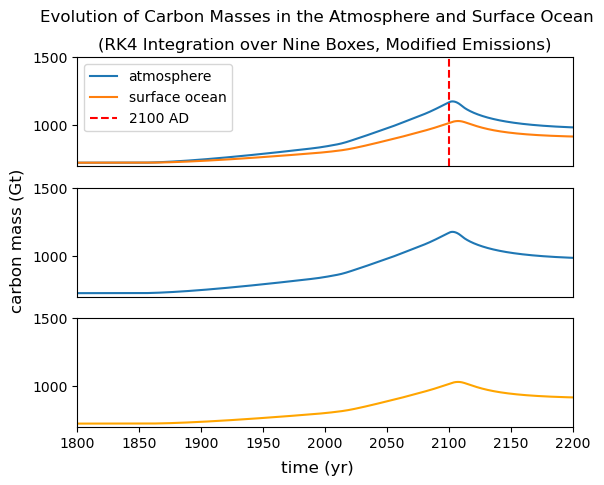

In [9]:
constants.FORCING = False
constants.FIRE = False
constants.MODIFIED_EMISSIONS = True

rungekutta_modified_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=2200, y0=constants.Mi0_nineboxes, N=5000)

masses_modified_nine = rungekutta_modified_nine[1]
time_modified_nine = rungekutta_modified_nine[0]

atm_arr_modified_nine = []
surfaceocean_arr_modified_nine = []

for i in range(len(masses_modified_nine)):
    atm_arr_modified_nine.append(masses_modified_nine[i][0])
    surfaceocean_arr_modified_nine.append(masses_modified_nine[i][1])    

fig_modified, axes_modified = plt.subplots(3,1)

axes_modified[0].plot(time_modified_nine, atm_arr_modified_nine), axes_modified[0].plot(time_modified_nine, surfaceocean_arr_modified_nine)
axes_modified[0].axvline(x=2100,color='r',linestyle='--')

axes_modified[1].plot(time_modified_nine, atm_arr_modified_nine)
axes_modified[2].plot(time_modified_nine, surfaceocean_arr_modified_nine, 'orange')

modified_ylim=[700,1500]
modified_xlim=[1800,2200]

axes_modified[0].set_ylim(modified_ylim), axes_modified[0].set_xlim(modified_xlim), axes_modified[0].xaxis.set_visible(False)
axes_modified[1].set_ylim(modified_ylim), axes_modified[1].set_xlim(modified_xlim), axes_modified[1].xaxis.set_visible(False)
axes_modified[2].set_ylim(modified_ylim), axes_modified[2].set_xlim(modified_xlim)

axes_modified[0].legend(['atmosphere','surface ocean','2100 AD'],loc='upper left')

fig_modified.supxlabel('time (yr)')
fig_modified.supylabel('carbon mass (Gt)')

fig_modified.suptitle('Evolution of Carbon Masses in the Atmosphere and Surface Ocean')
axes_modified[0].title.set_text('(RK4 Integration over Nine Boxes, Modified Emissions)')

# axes_modified[0].axhline(1400), axes_modified[0].axhline(1200)
# axes_modified[0].axvline(2200)

# **4. EXPERIMENTING (4% FOREST LOSS PER YEAR)**

In [10]:
constants.MODIFIED_EMISSIONS = False
constants.FORCING = True
constants.FIRE = True

rungekutta_experimenting_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=2200, y0=constants.Mi0_nineboxes, N=5000)

masses_experimenting_nine = rungekutta_experimenting_nine[1]
time_experimenting_nine = rungekutta_experimenting_nine[0]

atm_arr_experimenting_nine = []
longbiota_arr_experimenting_nine = []

for i in range(len(masses_experimenting_nine)):
    atm_arr_experimenting_nine.append(masses_experimenting_nine[i][0])
    longbiota_arr_experimenting_nine.append(masses_experimenting_nine[i][5]) 

STEP SIZE: 0.08


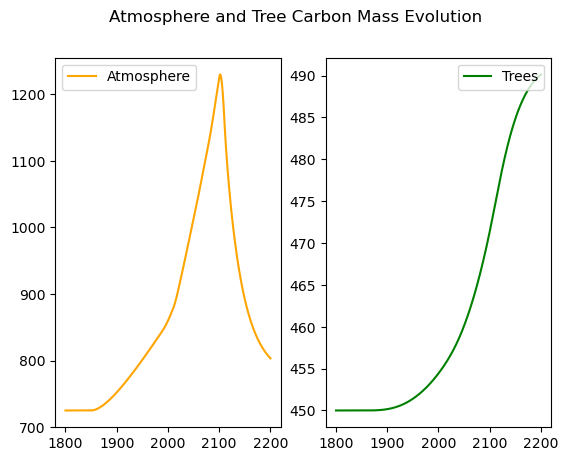

In [11]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(time_experimenting_nine, atm_arr_experimenting_nine, 'orange')
axes[1].plot(time_experimenting_nine, longbiota_arr_experimenting_nine, 'green')
axes[0].legend(['Atmosphere']), axes[1].legend(['Trees'], loc="upper right"), fig.suptitle('Atmosphere and Tree Carbon Mass Evolution')

plt.show()

In [12]:
rungekutta_onebox = rk4(fxy=ODEs_onebox, x0=xinitial, xf=2200, y0=constants.Mi0_onebox, N=5000)

STEP SIZE: 0.08


/Users/ejb/Desktop/UBCV/2024W1/eosc453/assn1/code/helpers.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  ODEs[r] = -np.sum(M[r]*rate_constants_fourboxes[r,:]) + (rate_constants_fourboxes[:,r] @ M)


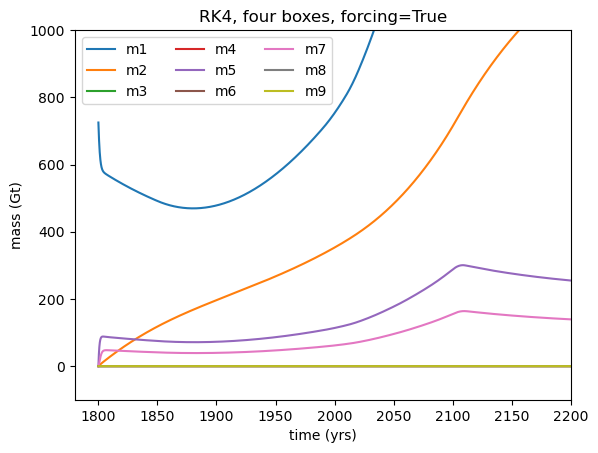

In [13]:
plt.plot(rungekutta_onebox[0],rungekutta_onebox[1])
plt.title(f'RK4, four boxes, forcing={constants.FORCING}'), plt.xlim(right=2200), plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)'), plt.legend(constants.label_arr, ncol=3)
plt.ylim(-100,1000)
plt.show()

- WILDFIRES and OCEAN CURRENTS (wind)
- go thru fulner paper and find topics we think matter... make a list of matters... for Wednesday... then build talk
- - additional reading outside... early earth climate... 

- plot 1st-order taylor of derivative (just for one box).. plot numerical vs analytical... add time-dependent forcing U see some challenges...

- configuration vs data files...
- pass T/F as param (forcing)

- numerical recipes add to esoteric wisdom

- an EXPERIMENT for FIRE model: lose 4% of forest per year for next 100 years
- - once we lose 20%... shift to grassland...
- - - forest canopy reduces albedo... absorbs more infrared... hangs on to temp => is wetter... in tropics, removing hardwoods exposes ground to more UV so ground dries up => albedo up -> loss of evap and humidity => grasslands!! 
- - what percent goes to ATM, what percent goes to PEAT
- FLUX v TIME ooorrr MASS v TIME plot to model fire stuff... implement phenomenon into code... i.e. LONG-LIVED BIOTA mass is decreasing over time

## SKETCH EXPERIMENT with respect to MODEL... and choose one of 6 experiments we've discussed

pick out KEY FIGURES and KEY FEATURES ... explain everything on figures with content

losing 4%... 